## Waste Mangment Using CNN Model

In [3]:
pip install opencv.python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# pip install tensorflow

In [2]:
# import necessary libraies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

In [6]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from glob import glob 


In [7]:
# Visualization
x_data = []
y_data = []
for category in glob(train_path+ '/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
        data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [05:27<00:00, 30.53it/s]


In [8]:
data.shape

(22564, 2)

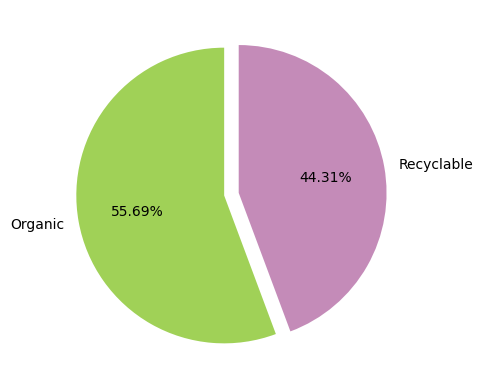

In [13]:
import matplotlib.pyplot as plt

colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors=colors, startangle=90, explode=[0.05, 0.05])
plt.show()


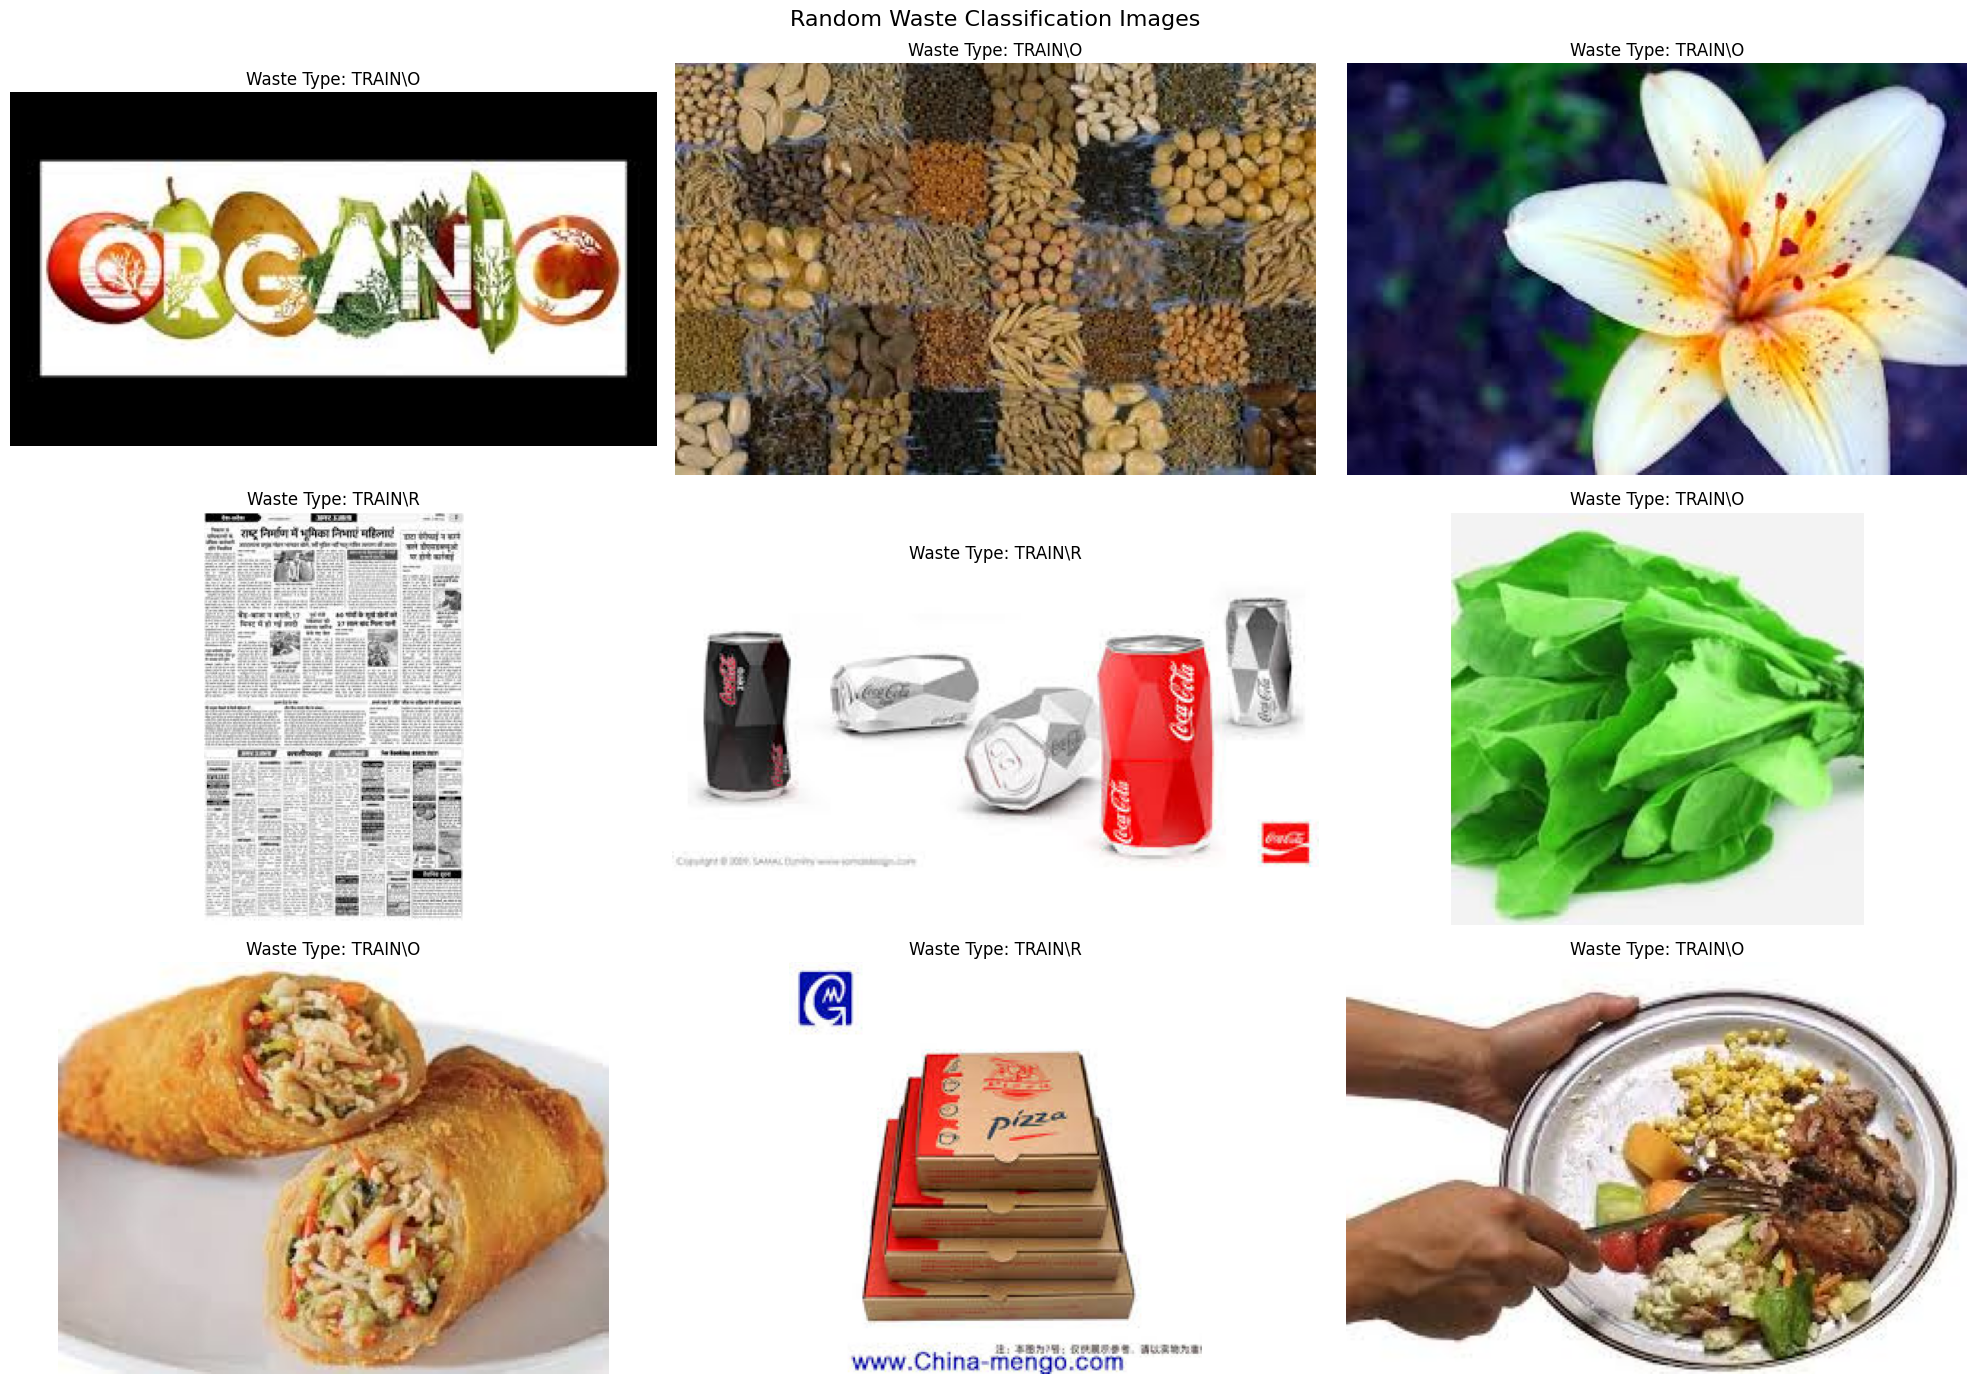

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,15))
plt.suptitle('Random Waste Classification Images', fontsize=16, y=0.95)

for i in range(9):
    plt.subplot(3, 3, i+1)  # Changed to 3x3 grid, fixed subplot syntax
    index = np.random.randint(15000)
    plt.title(f'Waste Type: {data.label[index]}')
    plt.imshow(data.image[index])
    plt.axis('off')  # Hide axes for cleaner look

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent title overlap
plt.show()


## CNN - Convolutional Neural Network

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Dense, Flatten, 
    Dropout, BatchNormalization, Activation
)
from tensorflow.keras.optimizers import Adam

# Model Configuration
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 2 # Number of waste categories
BATCH_SIZE = 32  # Reduced for better generalization

# Create Model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', input_shape=INPUT_SHAPE),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Dense Layers
    Flatten(),
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    Dense(NUM_CLASSES),
    Activation('softmax')
])

# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'AUC', 'Precision', 'Recall']
)

In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 56, 56, 128)    │             

 Total params: 51,738,018 (197.36 MB)

 Trainable params: 51,735,842 (197.36 MB)

 Non-trainable params: 2,176 (8.50 KB)

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
train_generator = train_datagen.flow_from_directory(
    directory="dataset/TRAIN", 
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    directory="dataset/TEST",
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    class_mode="categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [28]:

# Add steps_per_epoch and validation_steps to ensure proper batch processing

hist = model.fit(

    train_generator,

    epochs=10,

    validation_data=test_generator,

    steps_per_epoch=len(train_generator),

    validation_steps=len(test_generator)

)


Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 3167s 4s/step - AUC: 0.8645 - Precision: 0.7972 - Recall: 0.7972 - accuracy: 0.7972 - loss: 0.4758 - val_AUC: 0.7830 - val_Precision: 0.6419 - val_Recall: 0.6419 - val_accuracy: 0.6419 - val_loss: 0.9361
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 3066s 4s/step - AUC: 0.9235 - Precision: 0.8549 - Recall: 0.8549 - accuracy: 0.8549 - loss: 0.3536 - val_AUC: 0.9523 - val_Precision: 0.8890 - val_Recall: 0.8890 - val_accuracy: 0.8890 - val_loss: 0.2865
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 3018s 4s/step - AUC: 0.9336 - Precision: 0.8664 - Recall: 0.8664 - accuracy: 0.8664 - loss: 0.3292 - val_AUC: 0.9539 - val_Precision: 0.9013 - val_Recall: 0.9013 - val_accuracy: 0.9013 - val_loss: 0.2811
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 3006s 4s/step - AUC: 0.9444 - Precision: 0.8789 - Recall: 0.8789 - accuracy: 0.8789 - loss: 0.3014 - val_AUC: 0.9431 - val_Precision: 0.8766 - val_Recall: 0.8766 - val_accuracy: 0.8766 - val_loss: 0.3455
Epoch 5/10
706/706 ━━━━━